In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.text import rcParams

In [13]:
def T(a,x,y):
    R = a[0] + a[1]*x + a[2]*y + a[3]*x*y
    return R

In [14]:
P = np.array([[1,-1,-1,1],[1,1,-1,-1]])
A = np.zeros((4,4))
b = np.array([[1],[2],[0.5],[0.3]])
for i in range(4):
    A[i][0] = 1
    A[i][1] = P[0][i]
    A[i][2] = P[1][i]
    A[i][3] = P[0][i]*P[1][i]
print(A)

a = np.linalg.solve(A,b)
print(a)

print(T(a,1,1))
print(T(a,-1,1))
print(T(a,-1,-1))
print(T(a,1,-1))
print(T(a,0,0.5))

[[ 1.  1.  1.  1.]
 [ 1. -1.  1. -1.]
 [ 1. -1. -1.  1.]
 [ 1.  1. -1. -1.]]
[[ 0.95]
 [-0.3 ]
 [ 0.55]
 [-0.2 ]]
[1.]
[2.]
[0.5]
[0.3]
[1.225]


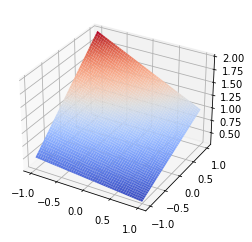

In [15]:
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X, Y= np.meshgrid(x,y)
Z = T(a, X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

El valor mínimo de la temperatura en el punto P es 0.6367664129532491 Kelvin
El ángulo al que corresponde la temperatura mínima en grados es: 151.95979899497488
El ángulo al que corresponde la temperatura mínima en radianes es: 2.652198823131082


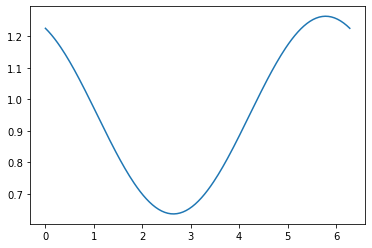

In [16]:
theta = np.linspace(0,2*np.pi,200)
temperatura = np.zeros(theta.shape)
R = np.zeros((2,2))

for i in range(len(theta)):
    R[0][0] = np.cos(theta[i])
    R[0][1] = -np.sin(theta[i])
    R[1][0] = np.sin(theta[i])
    R[1][1] = np.cos(theta[i])
    RP = R@P
    for j in range(4):
      A[j][0] = 1
      A[j][1] = RP[0][j]
      A[j][2] = RP[1][j]
      A[j][3] = RP[0][j]*RP[1][j]

    a = np.linalg.solve(A,b)
    temperatura[i] = T(a, 0, 0.5)

plt.plot(theta, temperatura)
print('El valor mínimo de la temperatura en el punto P es',np.min(temperatura),'Kelvin')
print('El ángulo al que corresponde la temperatura mínima en grados es:',theta[np.argmin(temperatura)]*(180/np.pi))
print('El ángulo al que corresponde la temperatura mínima en radianes es:',theta[np.argmin(temperatura)])